In [76]:
from zipfile import ZipFile
file_name = "drive/MyDrive/Colab Notebooks/Data/labledCountries128.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [77]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LSTM, Flatten, Conv2D, MaxPooling2D


In [78]:
model = Sequential([

    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    # Conv2D(128,(3,3),activation='relu',input_shape=(128,128,3)),
    # MaxPooling2D(2,2),

    Conv2D(256,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(512,activation='relu'),
    # Dropout(0.5),
    # Dense(256,activation='relu'),
    # Dense(117,activation='softmax')
    Dense(15,activation='softmax')
])


# Should add metric=[...]
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 128)      

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'labledCountries128/train'
validation_data_dir = 'labledCountries128/val'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    # shuffle=True
    )

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical')


Found 60201 images belonging to 15 classes.
Found 7433 images belonging to 15 classes.


In [81]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=6, verbose=1, restore_best_weights=True)

history = model.fit(
    train_generator,
    # steps_per_epoch=2000,
    validation_data=validation_generator,
    # validation_steps=200,
    batch_size=64,
    epochs=50,
    # class_weight = class_weights,
    # verbose=1
    callbacks=[early_stopping]
)

Epoch 1/50
941/941 [==============================] - 57s 59ms/step - loss: 2.1624 - categorical_accuracy: 0.2824 - val_loss: 1.8023 - val_categorical_accuracy: 0.4036
Epoch 2/50
941/941 [==============================] - 48s 51ms/step - loss: 1.7479 - categorical_accuracy: 0.4213 - val_loss: 1.6116 - val_categorical_accuracy: 0.4651
Epoch 3/50
941/941 [==============================] - 50s 54ms/step - loss: 1.5613 - categorical_accuracy: 0.4786 - val_loss: 1.4153 - val_categorical_accuracy: 0.5293
Epoch 4/50
941/941 [==============================] - 53s 57ms/step - loss: 1.4412 - categorical_accuracy: 0.5166 - val_loss: 1.3877 - val_categorical_accuracy: 0.5361
Epoch 5/50
941/941 [==============================] - 53s 57ms/step - loss: 1.3502 - categorical_accuracy: 0.5482 - val_loss: 1.2820 - val_categorical_accuracy: 0.5669
Epoch 6/50
941/941 [==============================] - 50s 53ms/step - loss: 1.2618 - categorical_accuracy: 0.5739 - val_loss: 1.2442 - val_categorical_accuracy:

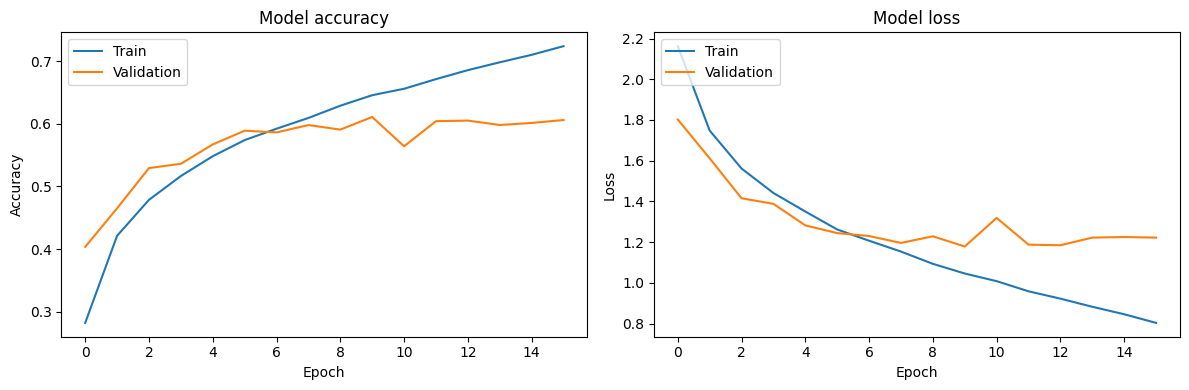

In [82]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [83]:
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

data_dir = 'labledCountries128/test'
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    shuffle = False
)

class_names = test_generator.class_indices.keys()

Found 7471 images belonging to 15 classes.


117/117 [==============================] - 6s 51ms/step
[[8.72968554e-01 1.89964974e-03 4.59349103e-05 2.03252473e-08
  2.30441458e-07 2.47532284e-06 1.41144471e-06 3.29405360e-04
  3.31880945e-09 2.62349613e-06 9.69208995e-05 4.86087231e-07
  3.02518711e-05 1.27390337e-07 1.24621838e-01]
 [4.47875634e-03 1.03040904e-01 1.93971954e-03 6.89316392e-02
  5.33773971e-04 1.87175930e-01 4.82926220e-02 7.67470375e-02
  2.24021584e-01 7.00833090e-03 2.28273168e-01 3.85532016e-03
  9.66072641e-03 8.49652686e-04 3.51908468e-02]
 [3.44797343e-01 1.05245978e-01 4.84598306e-04 1.04978913e-02
  1.96216351e-05 4.98164408e-02 5.49268490e-03 1.20422415e-01
  1.37363491e-03 6.50268747e-04 2.73901969e-01 1.47480909e-02
  4.15361449e-02 4.04402893e-03 2.69688908e-02]
 [1.32955322e-02 1.26608636e-03 1.98518112e-03 5.47850132e-02
  1.95478860e-04 5.95762208e-02 5.91007948e-01 1.19000990e-02
  1.26093170e-02 1.43762659e-02 1.64965779e-01 4.56240922e-02
  9.05204040e-04 2.09445767e-02 6.56321691e-03]
 [9.7163

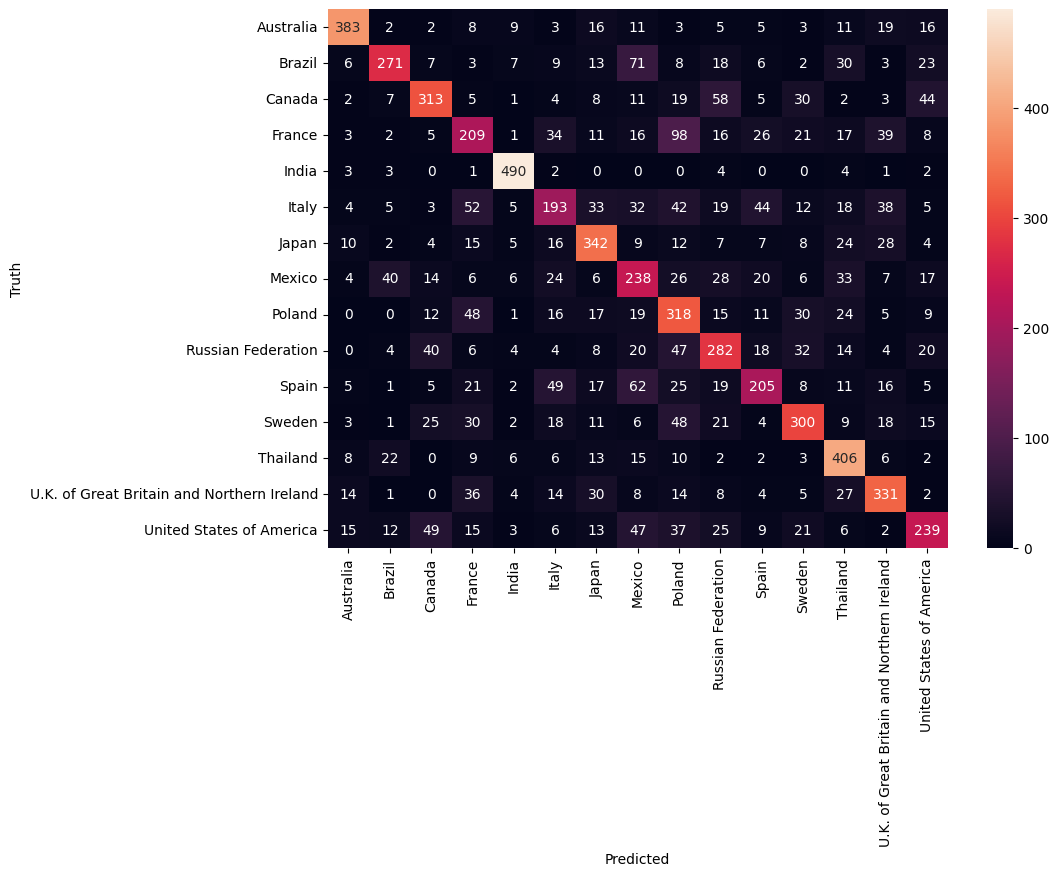

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = test_generator.classes

# Predict the values from the validation dataset
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred[:10])

# confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# classification report
print('Classification Report: ')
print(classification_report(y_true, y_pred_classes, target_names=class_names))


1/1 [==============================] - 0s 16ms/step


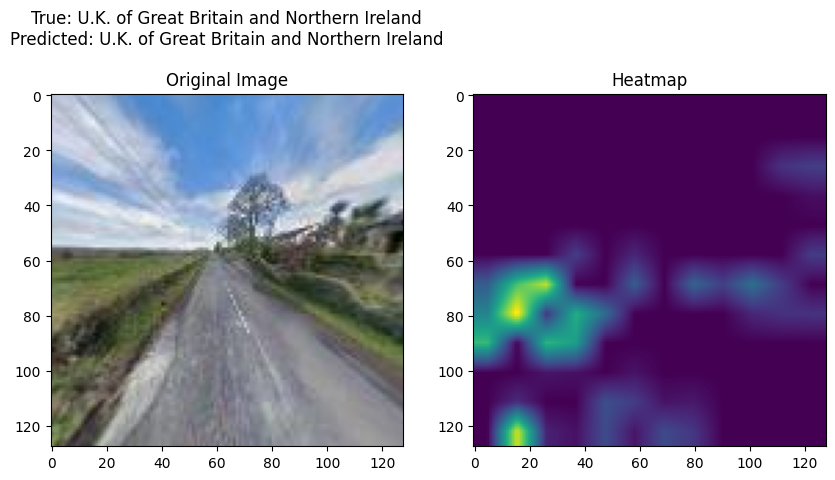

In [117]:
import tensorflow as tf
import cv2
import random


num_batches = len(test_generator)
batch_num = random.randint(0, num_batches - 1)

# Get the images and labels for this batch
images, labels = test_generator[batch_num]

# Randomly select an image and label from the batch
num_images = len(images)
image_num = random.randint(0, num_images - 1)

image = images[image_num]
label = labels[image_num]

# Create a model that maps the input image to the last convolutional layer
model_layers = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=model_layers)

# Get the activations from the last convolutional layer
activations = activation_model.predict(image.reshape(1, *image.shape))

# Get the last convolutional layer
last_conv_layer = model.get_layer(index=-6)

# Create a new model that outputs both the original model's predictions
# as well as the output of the last convolutional layer
new_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=[model.output, last_conv_layer.output]
)

with tf.GradientTape() as tape:
    # Forward pass
    preds, conv_outputs = new_model(tf.expand_dims(image, axis=0))
    # Get the class index
    class_idx = tf.argmax(preds[0])
    # Calculate the loss value for the class index
    loss = preds[:, class_idx]

# Get the gradients of the loss with respect to the convolutional layer's output
grads = tape.gradient(loss, conv_outputs)

# Pool gradients over all axes leaving out the channel dimension
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply the convolutional layer's output with the pooled gradients across all channels
# And average it across all channels to obtain the heatmap
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

# Normalize the heatmap between 0 & 1 for visualization
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

# Convert the heatmap to numpy array before resizing
heatmap_np = heatmap[0].numpy()

# Resize the heatmap to match the size of the original image
heatmap_resized = cv2.resize(heatmap_np, (image.shape[1], image.shape[0]))

class_names = list(test_generator.class_indices.keys())

# Get the model's prediction
preds = model.predict(tf.expand_dims(image, axis=0))
predicted_class_idx = tf.argmax(preds[0]).numpy()

# Get the predicted class name
predicted_class_name = class_names[predicted_class_idx]

# Get the correct class name
correct_class_idx = tf.argmax(label).numpy()
correct_class_name = class_names[correct_class_idx]

# Plot the original image and the heatmap
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f'True: {correct_class_name}\nPredicted: {predicted_class_name}\n\nOriginal Image')

plt.subplot(1, 2, 2)
plt.imshow(heatmap_resized)
plt.title('Heatmap')
plt.show()

